# Population, Agricultural Production, and the Green Revolution

**What is this?** 

This file is a template document that each member of our team copied to perform their data analysis and visualisations. Given that our topic is the Green Revolution and its impact on population in Asia, we divided the work into regions. Emma was assigned South Asia (SA), Elan: East Asia (EA), Ploy: Mainland Southeast Asia (SEA), and Xinyu and Xi Wang Maritime Southeast Asia (MSEA). 

**Why did we make it?**

We all wanted to create similar visualisations and analyses for each region to answer the core question of what affect on agriculutre, and thus population, the Green Revolution had. However, given our lack of familiarity with Git, we didn't want to risk working on a single file and accidentally overwriting each other's work. We decided to work in our own, cloned files in the main branch to address these concerns, while also allowing for some creative liberty in the exact visualisations we are making. 

**Who made this?**

Emma Azhan

In [20]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Set World Bank Data Sources/Indicators for Population
 
SOURCE = 40 # "Population estimates and projections
pop_indicators = wbdata.get_indicators(source=SOURCE)

pop_indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

## Population Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [6]:
# Load in population data and specify SA data set
variable_labels = {"SP.POP.TOTL":"Total Population", 
                   "SP.POP.TOTL.FE.IN":"Total Female",
                  "SP.POP.TOTL.MA.IN":"Total Male",
                  "SP.RUR.TOTL":"Total Rural",
                  "SP.URB.TOTL":"Total Urban"}
countries = {"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }

SA_pop = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()

SA_pop = SA_pop.unstack('country')
SA_pop = SA_pop.reset_index()
SA_pop = SA_pop.rename(columns={'date': 'Year'})
SA_pop = SA_pop.set_index(['Year']).sort_index()
SA_pop
# Attributes of interest: Total Population, Total Female Population, Total Male Population, Total Rural Population
# and Total Urban Population

Total Population                                                \
country          Bangladesh    Bhutan         India  Maldives       Nepal   
Year                                                                        
1960-01-01       51828660.0  224084.0  4.359903e+08   91189.0  10123658.0   
1961-01-01       53310348.0  230602.0  4.465647e+08   93450.0  10318396.0   
1962-01-01       54881146.0  237636.0  4.572831e+08   95802.0  10521116.0   
1963-01-01       56504402.0  245156.0  4.681386e+08   98222.0  10729818.0   
1964-01-01       58178374.0  252987.0  4.792296e+08  100662.0  10946392.0   
...                     ...       ...           ...       ...         ...   
2019-01-01      164913055.0  764824.0  1.389030e+09  487731.0  28414064.0   
2020-01-01      166298024.0  770006.0  1.402618e+09  502118.0  28966574.0   
2021-01-01      167658854.0  775442.0  1.414204e+09  516154.0  29475010.0   
2022-01-01      169384897.0  780914.0  1.425423e+09  524106.0  29715436.0   
2023-01-01      171466990.0  786385.0  1.438070e+09  525994.0  29694614.0   

                                                            Total Female  \
country        Pakistan South Asia (IDA & IBRD)   Sri Lanka   Bangladesh   
Year                                                                       
1960-01-01   45709310.0            5.626637e+08   9661389.0   24878240.0   
1961-01-01   46921277.0            5.765523e+08   9899372.0   25598804.0   
1962-01-01   48156128.0            5.907231e+08  10143754.0   26362885.0   
1963-01-01   49447776.0            6.051635e+08  10395040.0   27151732.0   
1964-01-01   50799999.0            6.199757e+08  10653397.0   27964907.0   
...                 ...                     ...         ...          ...   
2019-01-01  230800899.0            1.874070e+09  21803000.0   83750865.0   
2020-01-01  235001746.0            1.895144e+09  21919000.0   84419144.0   
2021-01-01  239477801.0            1.914264e+09  22156000.0   85086513.0   
2022-01-01  243700667.0            1.932289e+09  22181000.0   85985502.0   
2023-01-01  247504495.0            1.951540e+09  22037000.0   87109279.0   

                      ...             Total Rural             Total Urban  \
country       Bhutan  ... South Asia (IDA & IBRD)   Sri Lanka  Bangladesh   
Year                  ...                                                   
1960-01-01  108190.0  ...            4.690347e+08   8073926.0   2661402.0   
1961-01-01  111260.0  ...            4.798259e+08   8256868.0   2813720.0   
1962-01-01  114541.0  ...            4.904980e+08   8444371.0   3017365.0   
1963-01-01  118028.0  ...            5.013298e+08   8636615.0   3236007.0   
1964-01-01  121664.0  ...            5.123986e+08   8840828.0   3469758.0   
...              ...  ...                     ...         ...         ...   
2019-01-01  353962.0  ...            1.228334e+09  17750912.0  61685728.0   
2020-01-01  356798.0  ...            1.233680e+09  17817298.0  63487597.0   
2021-01-01  359754.0  ...            1.237335e+09  17977378.0  65296417.0   
2022-01-01  362724.0  ...            1.239792e+09  17960843.0  67264436.0   
2023-01-01  365702.0  ...            1.242580e+09  17803472.0  69397835.0   

                                                                    \
country       Bhutan        India  Maldives      Nepal    Pakistan   
Year                                                                 
1960-01-01    8058.0   78146908.0   10189.0   352303.0  10103586.0   
1961-01-01    8744.0   80524552.0   10494.0   368470.0  10557757.0   
1962-01-01    9503.0   83307833.0   10814.0   380023.0  10956001.0   
1963-01-01   10338.0   86160905.0   11143.0   391960.0  11373977.0   
1964-01-01   11248.0   89112744.0   11479.0   404469.0  11814048.0   
...              ...          ...       ...        ...         ...   
2019-01-01  318259.0  478826529.0  196253.0  5726286.0  85181688.0   
2020-01-01  325836.0  489878256.0  204206.0  5960162.0  87338399.0   
2021-01-01  333502

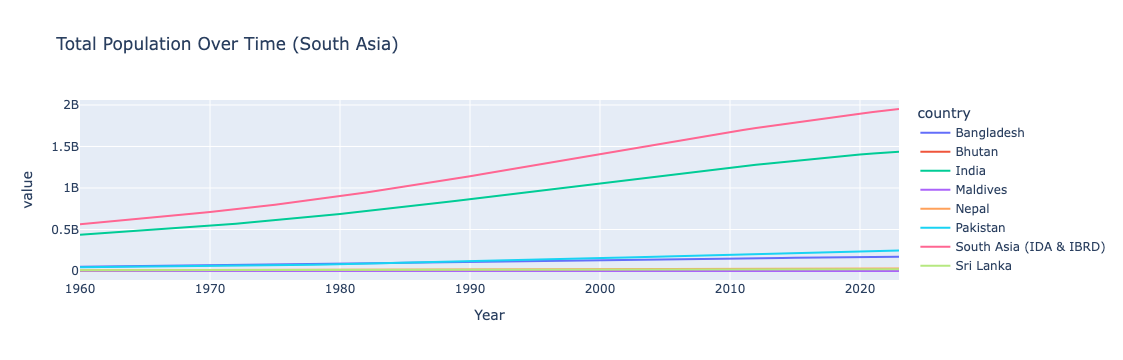

In [9]:
# Produce total population over time plot (include each country and the region)
SA_total = SA_pop["Total Population"]

SA_total.plot(title="Total Population Over Time (South Asia)")

<<<<<<< local


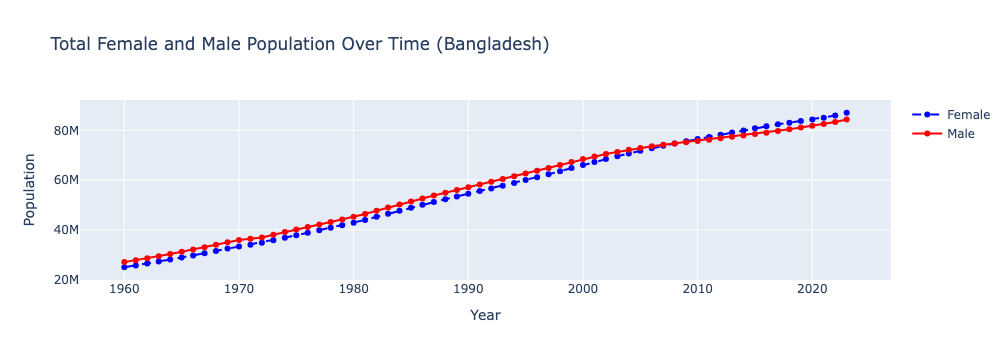

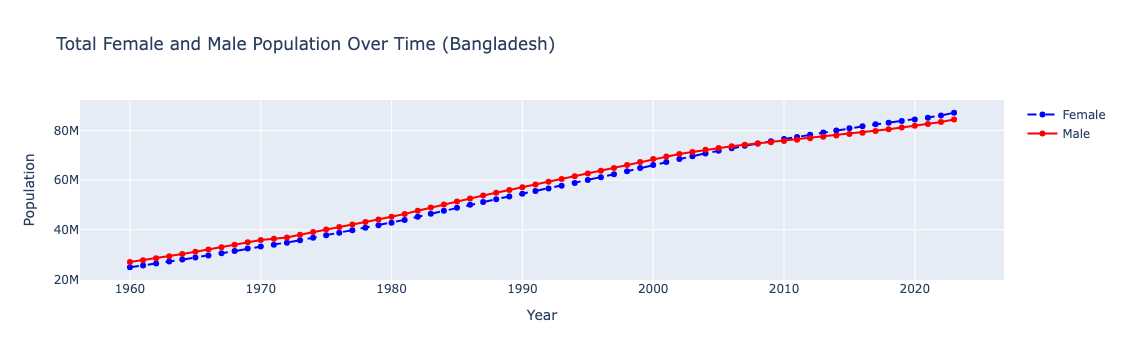

>>>>>>> remote


In [9]:
# Produce total female versus male populations over time for each country 
# Produce total female versus male populations over time for region as a whole
import plotly.graph_objects as go

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    female = df[('Total Female', country_name)]
    male = df[('Total Male', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Female and Male Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

overlay_population("Bangladesh", SA_pop)

<<<<<<< local


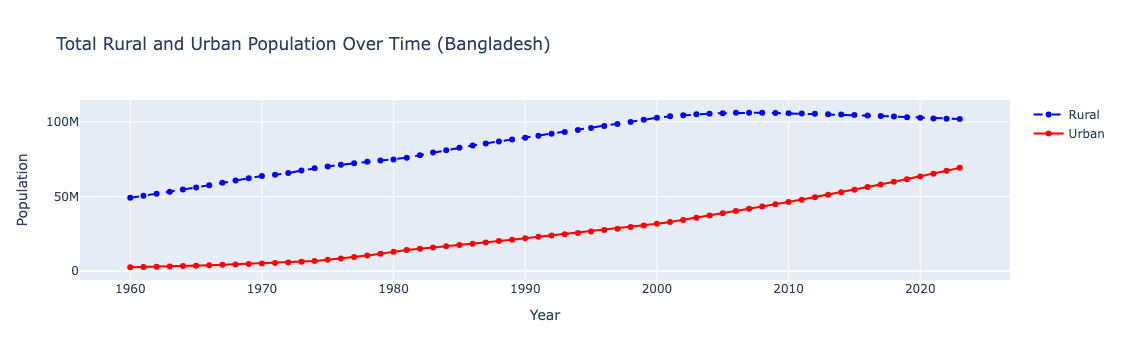

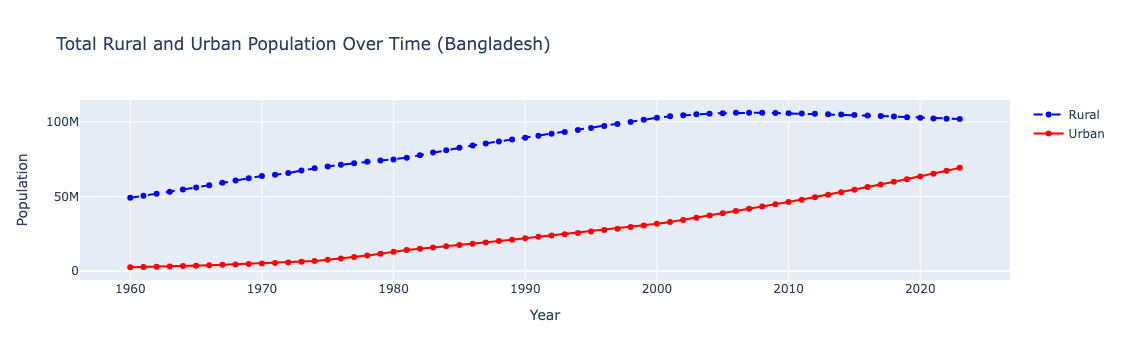

>>>>>>> remote


In [10]:
# Produce total rural versus urban populations over time for each country 
# Produce total rural versus urban populations over time for region as a whole

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    rural = df[('Total Rural', country_name)]
    urban = df[('Total Urban', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', name='Rural', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', name='Urban', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Rural and Urban Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

overlay_population("Bangladesh", SA_pop)

### Mainland Southeast Asia (Cambodia, Lao People’s Democratic Republic, Myanmar, Thailand, Viet Nam)

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)

## Agricultural Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [6]:
# Load in agricultural data and specify SA data set with attributes of interest

# Attributes of interest: Cereal Production, Crop Production Index, Food Production Index
# and Agricultural Value Added per Worker


In [8]:
# Produce total cereal production over time plot for each country, specifying each type of cereal
# Produce same plot for the whole region

In [9]:
# Produce Crop Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

In [ ]:
# Produce Food Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

In [ ]:
# Produce plot of Agricultural Value Added per Worker for each country

### Mainland Southeast Asia (Cambodia, Lao People’s Democratic Republic, Myanmar, Thailand, Viet Nam)

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)

## Combined Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [10]:
# Overlay total population growth for each country over time with crop production index over time

In [ ]:
# Overlay total crop production index over time with agriculutral value of worker added

In [ ]:
# Add asymptotes for major technological advancements in the timeline (i.e. new fertiliser, etc.)

### Mainland Southeast Asia (Cambodia, Lao People’s Democratic Republic, Myanmar, Thailand, Viet Nam)

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)